In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [2]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/corrbkgs/D0/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcandd0lite' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2336518079463007;1', 'DF_2336518079463007/O2hfcandd0fullp;1', 'DF_2336518079463007/O2hfcandd0lite;1', 'DF_2336518079463039;1', 'DF_2336518079463039/O2hfcandd0fullp;1', 'DF_2336518079463039/O2hfcandd0lite;1', 'DF_2336518079646559;1', 'DF_2336518079646559/O2hfcandd0fullp;1', 'DF_2336518079646559/O2hfcandd0lite;1', 'DF_2336518079830111;1', 'DF_2336518079830111/O2hfcandd0fullp;1', 'DF_2336518079830111/O2hfcandd0lite;1', 'DF_2336518080013663;1', 'DF_2336518080013663/O2hfcandd0fullp;1', 'DF_2336518080013663/O2hfcandd0lite;1', 'DF_2336518080013695;1', 'DF_2336518080013695/O2hfcandd0fullp;1', 'DF_2336518080013695/O2hfcandd0lite;1', 'DF_2336518080197151;1', 'DF_2336518080197151/O2hfcandd0fullp;1', 'DF_2336518080197151/O2hfcandd0lite;1', 'DF_2336518080380703;1', 'DF_2336518080380703/O2hfcandd0fullp;1', 'DF_2336518080380703/O2hfcandd0lite;1', 'DF_2336518080564255;1', 'DF_2336518080564255/O2hfcandd0fullp;1', 'DF_2336518080564255/O2hfcandd0lite;1', 'DF_2336518080747807;1', 'DF_2336518080747807

In [3]:
print(full_df.columns)

Index(['fChi2PCA', 'fDecayLength', 'fDecayLengthXY', 'fDecayLengthNormalised',
       'fDecayLengthXYNormalised', 'fPtProng0', 'fPtProng1',
       'fImpactParameter0', 'fImpactParameter1', 'fImpactParameterNormalised0',
       'fImpactParameterNormalised1', 'fNSigTpcPi0', 'fNSigTpcKa0',
       'fNSigTofPi0', 'fNSigTofKa0', 'fNSigTpcTofPi0', 'fNSigTpcTofKa0',
       'fNSigTpcPi1', 'fNSigTpcKa1', 'fNSigTofPi1', 'fNSigTofKa1',
       'fNSigTpcTofPi1', 'fNSigTpcTofKa1', 'fCandidateSelFlag', 'fM', 'fPt',
       'fCpa', 'fCpaXY', 'fMaxNormalisedDeltaIP', 'fImpactParameterProduct',
       'fEta', 'fPhi', 'fY', 'fFlagMc', 'fFlagMcDecayChanRec', 'fOriginMcRec'],
      dtype='object')


In [4]:
unique_values = full_df['fFlagMc'].unique()
print("Unique values in fFlagMc:", unique_values)

full_df = full_df[full_df['fFlagMc'] != 0]
print(f"Unique values in fFlagMc after filtering: {sorted(full_df['fFlagMc'].unique())}")
print(f"len(full_df) after filtering: {len(full_df)}")

Unique values in fFlagMc: [  0  -8 -32  -2   2   8  16   4  32 -16]
Unique values in fFlagMc after filtering: [-32, -16, -8, -2, 2, 4, 8, 16, 32]
len(full_df) after filtering: 78


In [5]:
unique_values = full_df['fFlagMcDecayChanRec'].unique()
print("Unique values in fFlagMcDecayChanRec:", unique_values)

Unique values in fFlagMcDecayChanRec: [0 1 2]


<Axes: >

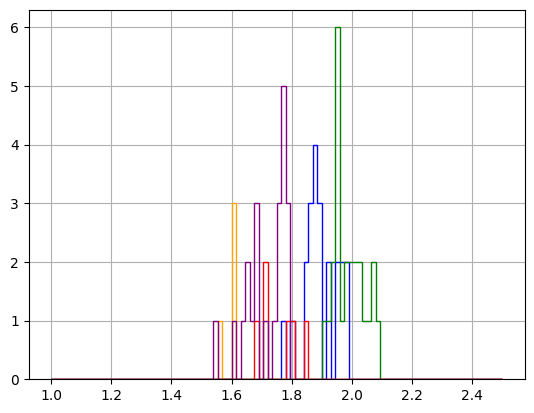

In [6]:
full_df.query('abs(fFlagMc) == 2')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMc == 2', color='blue')
full_df.query('abs(fFlagMc) == 4')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMc == 4', color='orange')
full_df.query('abs(fFlagMc) == 8')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMc == 8', color='green')
full_df.query('abs(fFlagMc) == 16')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMc == 16', color='red')
full_df.query('abs(fFlagMc) == 32')['fM'].hist(bins=100, range=(1, 2.5), histtype='step', label='fFlagMc == 32', color='purple')

In [7]:
print(full_df['fFlagMc'])

7        -8
8        -8
32      -32
33      -32
518      -2
         ..
16841    32
16866   -32
16867   -32
16868    -8
16869    -8
Name: fFlagMc, Length: 78, dtype: int8


Plotting fChi2PCA
Plotting fDecayLength
Plotting fDecayLengthXY
Plotting fDecayLengthNormalised
Plotting fDecayLengthXYNormalised
Plotting fPtProng0
Plotting fPtProng1
Plotting fImpactParameter0
Plotting fImpactParameter1
Plotting fImpactParameterNormalised0


/tmp/ipykernel_478474/3002618493.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fImpactParameterNormalised1
Plotting fNSigTpcPi0
Plotting fNSigTpcKa0
Plotting fNSigTofPi0
Plotting fNSigTofKa0
Plotting fNSigTpcTofPi0
Plotting fNSigTpcTofKa0
Plotting fNSigTpcPi1
Plotting fNSigTpcKa1
Plotting fNSigTofPi1
Plotting fNSigTofKa1
Plotting fNSigTpcTofPi1
Plotting fNSigTpcTofKa1
Plotting fCandidateSelFlag
Plotting fM
Plotting fPt
Plotting fCpa
Plotting fCpaXY
Plotting fMaxNormalisedDeltaIP
Plotting fImpactParameterProduct
Plotting fEta
Plotting fPhi
Plotting fY
Plotting fFlagMc
Plotting fFlagMcDecayChanRec
Plotting fOriginMcRec


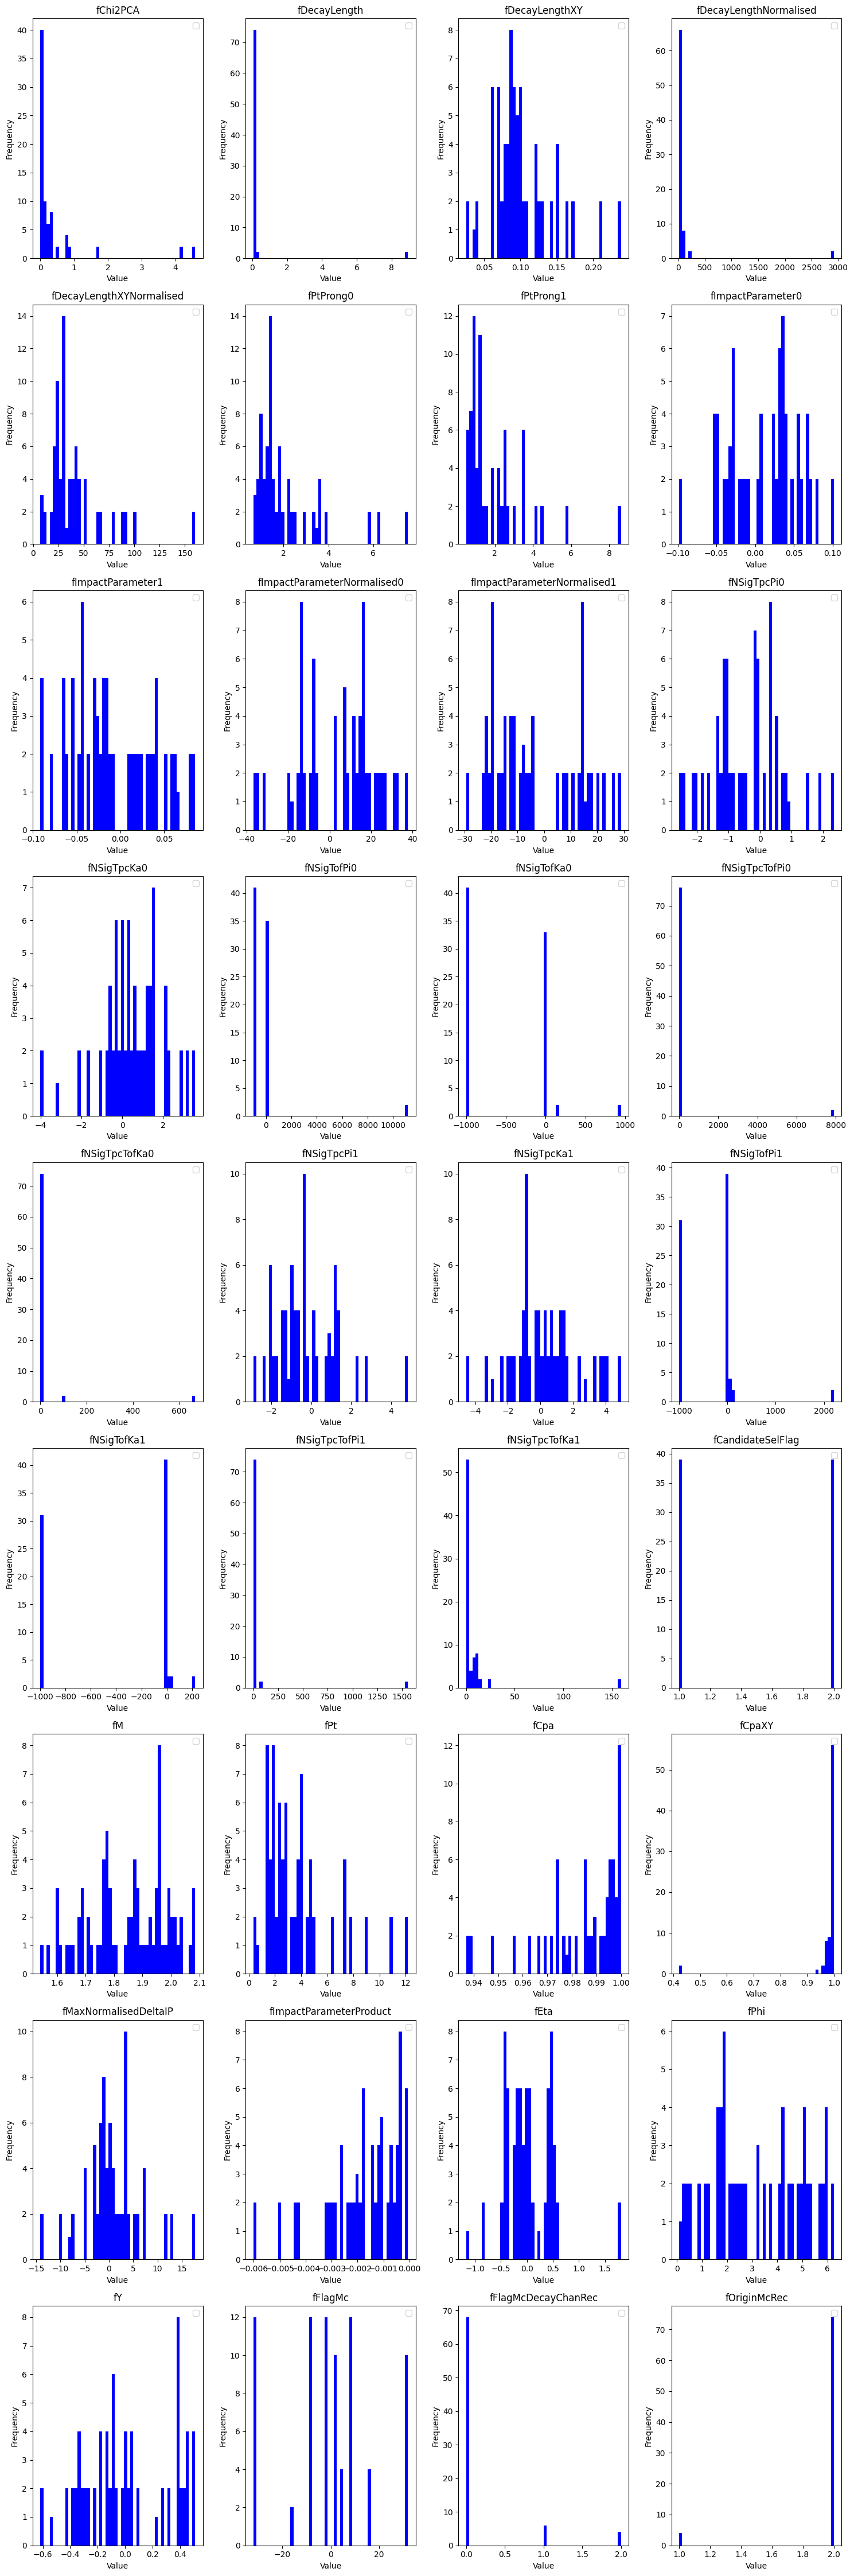

In [8]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()